In [1]:
# baixei o grafico da noticia em 2015-03-15 às 01:02:03
#!wget http://s2.glbimg.com/dSOq2KmDstd2L_434azcbAHSPjc=/s.glbimg.com/jo/g1/f/original/2015/03/14/reservatorios1403.jpg

Acho que esse gráfico do G1 tá errado

G1 São Paulo
##Nível de água do Cantareira vai a 14,5%; todos reservatórios sobem
[link da notícia](http://g1.globo.com/sao-paulo/noticia/2015/03/cantareira-vai-145-todos-reservatorios-sobem.html)

<!---![g1](reservatorios1403.jpg)-->

In [2]:
from IPython.display import display, Image

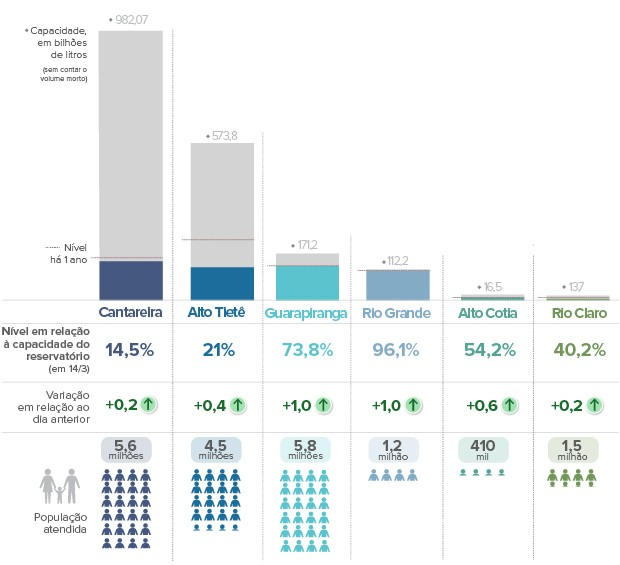

In [3]:
## eis a imagem da notícia
Image('reservatorios1403.jpg')

In [4]:
import urllib.request
req = urllib.request.urlopen("https://sabesp-api.herokuapp.com/").read().decode()

In [5]:
req

'[{"name":"Cantareira","data":[{"key":"volume armazenado","value":"14,5 %"},{"key":"pluviometria do dia","value":"6,4 mm"},{"key":"pluviometria acumulada no mês","value":"138,6 mm"},{"key":"média histórica do mês","value":"178,0 mm"}]},{"name":"Alto Tietê","data":[{"key":"volume armazenado","value":"21,0 %"},{"key":"pluviometria do dia","value":"30,0 mm"},{"key":"pluviometria acumulada no mês","value":"128,9 mm"},{"key":"média histórica do mês","value":"172,4 mm"}]},{"name":"Guarapiranga","data":[{"key":"volume armazenado","value":"73,8 %"},{"key":"pluviometria do dia","value":"19,8 mm"},{"key":"pluviometria acumulada no mês","value":"126,6 mm"},{"key":"média histórica do mês","value":"153,2 mm"}]},{"name":"Alto Cotia","data":[{"key":"volume armazenado","value":"54,2 %"},{"key":"pluviometria do dia","value":"4,8 mm"},{"key":"pluviometria acumulada no mês","value":"79,2 mm"},{"key":"média histórica do mês","value":"149,1 mm"}]},{"name":"Rio Grande","data":[{"key":"volume armazenado","va

In [6]:
import json
data = json.loads(req)

In [7]:
for x in data:
    print (x['name'])
    for i in range(len(x['data'])):
        item = x['data'][i]
        print (i, item['key'], item['value'])
        
    print ( [item['value'] for item in x['data'] ])
    print('-----')

Cantareira
0 volume armazenado 14,5 %
1 pluviometria do dia 6,4 mm
2 pluviometria acumulada no mês 138,6 mm
3 média histórica do mês 178,0 mm
['14,5 %', '6,4 mm', '138,6 mm', '178,0 mm']
-----
Alto Tietê
0 volume armazenado 21,0 %
1 pluviometria do dia 30,0 mm
2 pluviometria acumulada no mês 128,9 mm
3 média histórica do mês 172,4 mm
['21,0 %', '30,0 mm', '128,9 mm', '172,4 mm']
-----
Guarapiranga
0 volume armazenado 73,8 %
1 pluviometria do dia 19,8 mm
2 pluviometria acumulada no mês 126,6 mm
3 média histórica do mês 153,2 mm
['73,8 %', '19,8 mm', '126,6 mm', '153,2 mm']
-----
Alto Cotia
0 volume armazenado 54,2 %
1 pluviometria do dia 4,8 mm
2 pluviometria acumulada no mês 79,2 mm
3 média histórica do mês 149,1 mm
['54,2 %', '4,8 mm', '79,2 mm', '149,1 mm']
-----
Rio Grande
0 volume armazenado 96,1 %
1 pluviometria do dia 2,6 mm
2 pluviometria acumulada no mês 157,0 mm
3 média histórica do mês 186,3 mm
['96,1 %', '2,6 mm', '157,0 mm', '186,3 mm']
-----
Rio Claro
0 volume armazenado 4

In [8]:
## com isso posso usar list comprehension para pegar os dados que me interessam

[ (x['name'], x['data'][0]['value']) for x in data ] 

[('Cantareira', '14,5 %'),
 ('Alto Tietê', '21,0 %'),
 ('Guarapiranga', '73,8 %'),
 ('Alto Cotia', '54,2 %'),
 ('Rio Grande', '96,1 %'),
 ('Rio Claro', '40,2 %')]

In [9]:
import datetime as dt

In [10]:
today = dt.date(2015,3,14)
yr = dt.timedelta(days=365)
dec = 10*yr
last_year = today - yr

In [11]:
last_year.isoformat()

'2014-03-14'

In [106]:
def getData(date):
    """recebe um objeto date ou uma string com a data no 
    formato YYYY-MM-DD e retorna uma 'Série' (do pacote pandas)
    com os níveis dos reservatórios da sabesp"""
    
#     def parsePercent(s):
#         """recebe uma string no formato '\d*,\d* %' e retorna o float equivalente"""
#         return float(s.replace(",",".").replace("%",""))
#    da pra fazer com o lambda tbm, huehue
    parsePercent = lambda s: float(s.replace(",",".").replace("%",""))
    
    import datetime
    if type(date) == datetime.date:
        date = date.isoformat()
    
    ## requisição
    import urllib.request
    req = urllib.request.urlopen("https://sabesp-api.herokuapp.com/" + date).read().decode()
    
    ## transforma o json em dicionario
    import json
    data = json.loads(req)
    
    ## serie
    dados = [ parsePercent(x['data'][0]['value']) for x in data ]
    sistemas = [ x['name'] for x in data ]
    
    import pandas as pd
    return pd.Series(dados, index=sistemas, name=date)   

In [107]:
getData(last_year)

Cantareira      15.5
Alto Tietê      38.5
Guarapiranga    74.4
Alto Cotia      59.1
Rio Grande      97.6
Rio Claro       90.6
Name: 2014-03-14, dtype: float64

In [14]:
getData('2015-03-13')

Cantareira      14.3
Alto Tietê      20.6
Guarapiranga    72.8
Alto Cotia      53.6
Rio Grande      95.1
Rio Claro       40.0
dtype: float64

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.mpl_style = 'default'

In [108]:
df = pd.DataFrame([getData(today), getData(last_year)]) #, index=[today, last_year])

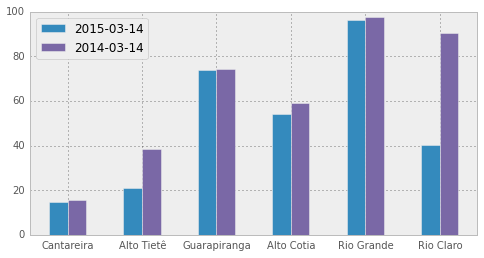

,Cantareira,Alto Tietê,Guarapiranga,Alto Cotia,Rio Grande,Rio Claro
2015-03-14,14.5,21.0,73.8,54.2,96.1,40.2
2014-03-14,15.5,38.5,74.4,59.1,97.6,90.6


In [195]:
df.T.plot(kind='bar', rot=0, figsize=(8,4))
plt.show()

df

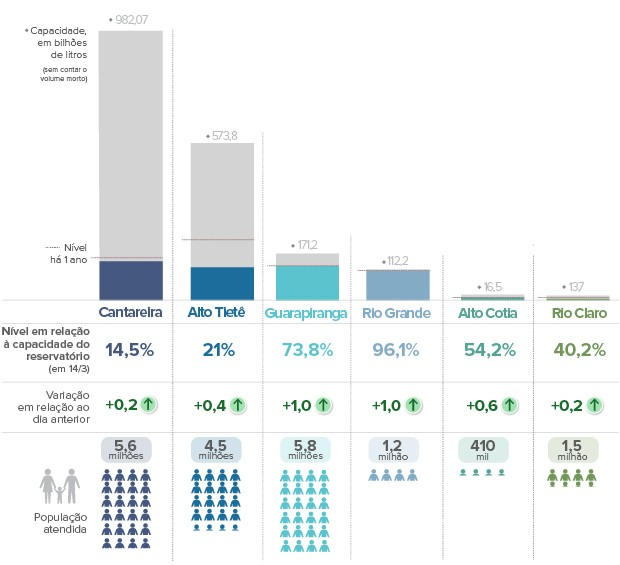

In [33]:
Image('reservatorios1403.jpg')

OK. Tudo certo. Bate com os gráficos mostrados pelo G1, apenas está sendo mostrado de uma forma diferente. 

Só temos um pequeno problema aí: esses percentuais são em relação à capacidade reservatório na data consultada. Acontece que, pelo menos para o Cantareira e o Alto Tietê, esse volume VARIA (volume morto mandou um oi). 

Vejam:

In [118]:
datas = [last_year,
         '2014-05-15', # pré-volume morto
         '2014-05-16', # estréia da "primeira reserva técnica", ou o volume morto
         '2014-07-12',
         '2014-10-23',
         '2014-10-24', # "segunda reserva técnica" ou "VOLUME MORTO 2: ELECTRIC BOOGALOO"
         '2015-01-01', # feliz ano novo ?
         today]
import numpy as np
dfVM = pd.DataFrame(pd.concat(map(getData, datas), axis=1)) #, index=datas, columns=df.columns)

In [121]:
dfVM = dfVM.T

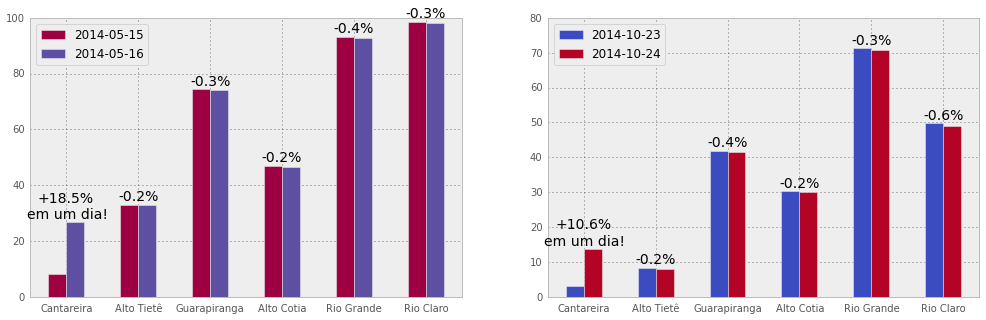

In [193]:
vm = [['2014-05-15','2014-05-16'],
      ['2014-10-23','2014-10-24']]
# c = [['c','m'],
#      ['b','r']]

c = ['Spectral',
     'coolwarm']

fig, axes = plt.subplots(1,2, figsize=(17,5))
for i, ax in enumerate(axes):
    dfVM.ix[vm[i]].T.plot(kind='bar', ax=ax,
                          rot=0, colormap=c[i])
    #ax.get_xaxis().set_visible(False)
    itens = dfVM.Cantareira.ix[vm[i]]
        
    ax.text(0,itens.max() +0.5, 
            '+{}%\nem um dia!'.format(itens[1] - itens[0]), 
            ha='center', va='bottom', fontsize=14, color='k')
    for j in range(1,6):
        itens = dfVM.ix[vm[i],j]
        ax.text(j,itens.max() +0.5, 
            '{:0.1f}%'.format(itens[1] - itens[0]), 
            ha='center', va='bottom', fontsize=14, color='k')
    
plt.show()



o cantareira tem capacidade total de quase 1 trilhão de litros, segundo a matéria do G1. 
18% e 10% disso são, respectivamente, 180 e 100 bilhões de litros de água. 

Na boa, isso é muita água. MUITA. Simplesmente não chove td isso em um dia.

ENTAO COMO?!? DE ONDE VEIO TODA ESSA AGUA???

#QUE BRUXARIA É ESSA?!?

O próprio [site](http://www2.sabesp.com.br/mananciais/DivulgacaoSiteSabesp.aspx) da sabesp esclarece:


- A **primeira reserva técnica** entrou em operação em **16/05/2014** e acrescentou mais **182,5 bilhões** de litros ao sistema - 18,5% de acréscimo;

- A **segunda reserva técnica** entrou em operação em **24/10/2014** e acrescentou mais **105,4 bilhões** de litros ao sistema - 10,7% de acréscimo 


O percentual que a sabesp divulga é em relação ao volume útil na data da consulta, 